<a href="https://colab.research.google.com/github/JonathonLeiding/introductory_neural_network/blob/main/easy_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
# Create a Model Class that inherits the nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -> H1 Layer (some # of neurons) -> H2 Layer (some # of neurons) -> H1 Layer (some # of neurons) -> Output layer (3 classes of iris flowers)

    def __init__(self, in_features=4, h1=8, h2=9, h3=10, out_features=3):
        super().__init__() #instantiates nn.Module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.out = nn.Linear(h3, out_features)

        # Feed Forward
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))

        return x



In [134]:
# Pick a seed for randomization
torch.manual_seed(29)
# Create an instance of a Model
model = Model()

In [135]:
%matplotlib inline

In [136]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [137]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [138]:
#Could also do my_df['species'] = my_df['species'].replace('setosa', 0.0) and repeat for all three species
my_df['species'] = my_df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

In [139]:
# Train Test Split! Set X, Y    (Note that .values convert these values to numpy arrays)
X = my_df.drop('species', axis=1).values
Y = my_df['species'].values

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=29)

In [142]:
# Convert X features to FloatTensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert Y features to LongTensor (because they are 64 bit integers)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [143]:
# Set the criteria for which we measure our error (disparity between correct answers)
criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizers and set learning rate (if learning rate is too high our error won't go down even after a bunch of iterations/epochs => lower lr longer it takes to learn)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [144]:
model.parameters()

<generator object Module.parameters at 0x7974bb2f9620>

In [145]:
#Train our Model (Epoch := going through all the training data one time)
epochs = 1000
losses = []

for i in range(epochs):
  # Go Forward
  y_prediction = model.forward(X_train) #Predicted results

  # Measure error
  loss = criterion(y_prediction, Y_train)
  losses.append(loss.detach().cpu().numpy()) #changes the elt from a tesnor to numpy array

  if i % 10 == 0:
    print(f"On Epoch Number {i} and loss is {loss}")

  # Do Some Back Propogation (changing weights on neurons by sending error rate of the forward propogation to learn "better")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

On Epoch Number 0 and loss is 2.359713315963745
On Epoch Number 10 and loss is 1.758827567100525
On Epoch Number 20 and loss is 1.620215892791748
On Epoch Number 30 and loss is 1.4901981353759766
On Epoch Number 40 and loss is 1.3693957328796387
On Epoch Number 50 and loss is 1.277105689048767
On Epoch Number 60 and loss is 1.1692314147949219
On Epoch Number 70 and loss is 0.43736231327056885
On Epoch Number 80 and loss is 0.09839732199907303
On Epoch Number 90 and loss is 0.05972563475370407
On Epoch Number 100 and loss is 0.04969979450106621
On Epoch Number 110 and loss is 0.045603133738040924
On Epoch Number 120 and loss is 0.04337124526500702
On Epoch Number 130 and loss is 0.04182504117488861
On Epoch Number 140 and loss is 0.04058774933218956
On Epoch Number 150 and loss is 0.03951225429773331
On Epoch Number 160 and loss is 0.03853694349527359
On Epoch Number 170 and loss is 0.03762795776128769
On Epoch Number 180 and loss is 0.03676820918917656
On Epoch Number 190 and loss is 0

Text(0.5, 0, 'Epoch')

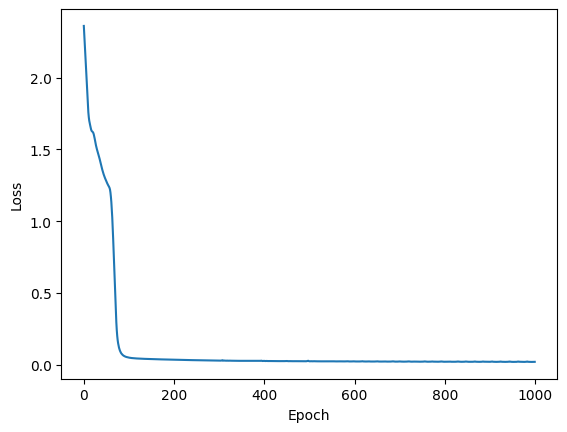

In [146]:
# Graph
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

We can also visualize the training loss over the epochs to see how the model converged.

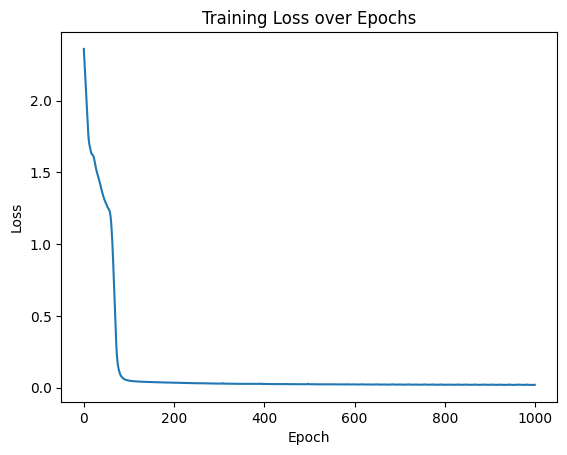

In [148]:
# Graph the loss
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Training Loss over Epochs")
plt.show()

Now that the model has been trained, let's evaluate its performance on the test set.

In [147]:
# Evaluate the model on the test set
with torch.no_grad(): # Turn off gradients for evaluation
    y_test_pred = model(X_test)
    test_loss = criterion(y_test_pred, Y_test)

print(f"Test Loss: {test_loss.item()}")

# Calculate accuracy
correct = (torch.argmax(y_test_pred, dim=1) == Y_test).sum().item()
accuracy = correct / len(Y_test)
print(f"Test Accuracy: {accuracy}")

Test Loss: 0.1752517968416214
Test Accuracy: 0.9666666666666667
